## Exploratory-Data-Analysis-on-Spotify-2023-Dataset

GUIDE QUESTIONS:

Overview of Dataset
- How many rows and columns does the dataset contain?
- What are the data types of each column? Are there any missing values?

Basic Descriptive Statistics
- What are the mean, median, and standard deviation of the streams column?
- What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

Top Performers
- Which track has the highest number of streams? Display the top 5 most streamed tracks.
- Who are the top 5 most frequent artists based on the number of tracks in the dataset?

Temporal Trends
- Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
- Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

Genre and Music Characteristics
- Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
- Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

Platform Popularity
- How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

Advanced Analysis
- Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
- Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

In [3]:
# Start
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the file and make sure to use the "encoding = 'ISO-8859-1'" for it to load or else it will not load
df = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [5]:
# Use pandas to fill every song that has a missing key with "C"
df.iloc[:, 15] = df.iloc[:, 15].fillna("C")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [6]:
# Overview of Dataset
# Check the number of rows and columns, data types, and missing values
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 953, Number of columns: 24


In [7]:
# For data types of each column 
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [8]:
# Check for missing values in each column
print(df.isnull().sum())  

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [9]:
# Basic Descriptive Statistics
# Converting 'streams' into numeric then converting any non-numeric values to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

print(f"The mean, median, and standard deviation of the streams column")

# Drop rows with NaN in 'streams' (if any) to avoid calculation errors
df = df.dropna(subset=['streams'])

# Calculate mean, median, and standard deviation for 'streams' column
# Mean
print("Mean streams:", df['streams'].mean())

# Median
print("Median streams:", df['streams'].median())

# Standard deviation
print("Standard deviation of streams:", df['streams'].std())

The mean, median, and standard deviation of the streams column
Mean streams: 514137424.93907565
Median streams: 290530915.0
Standard deviation of streams: 566856949.0388832


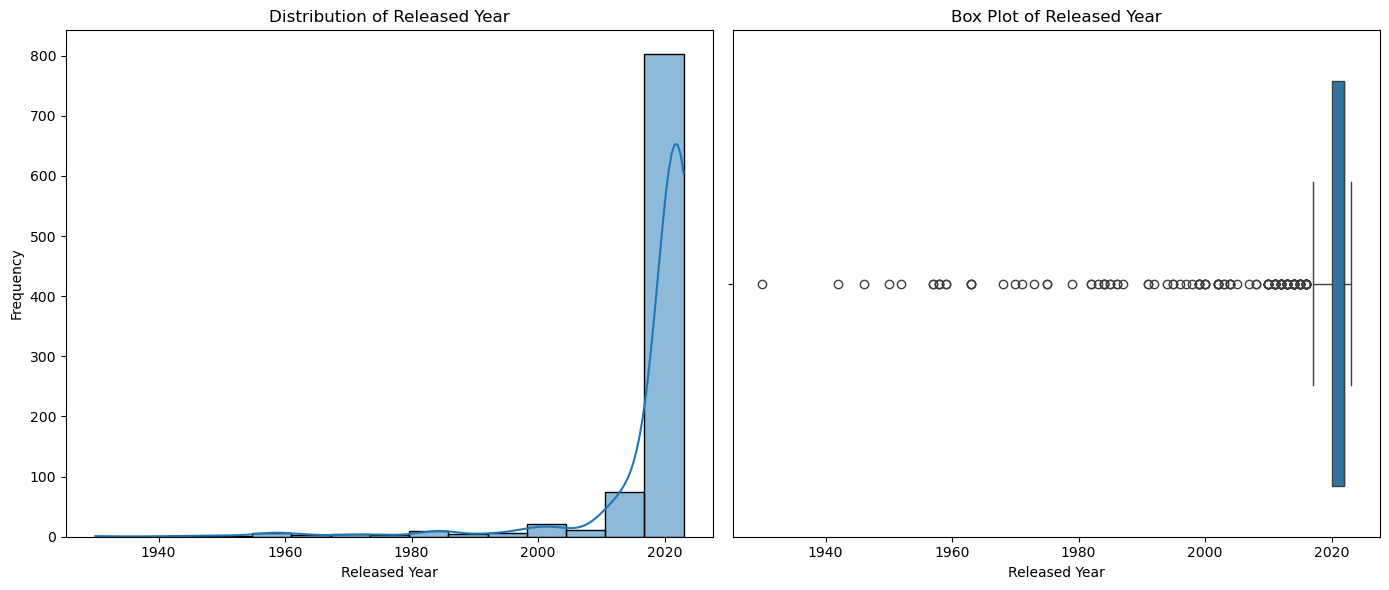

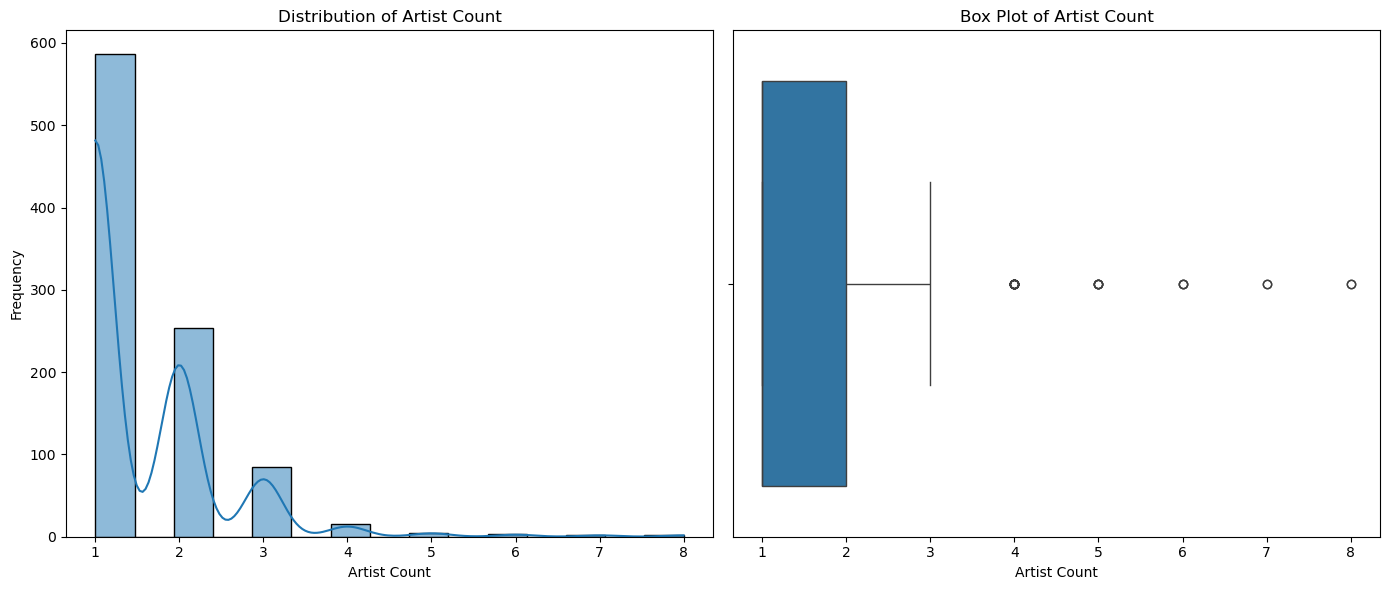

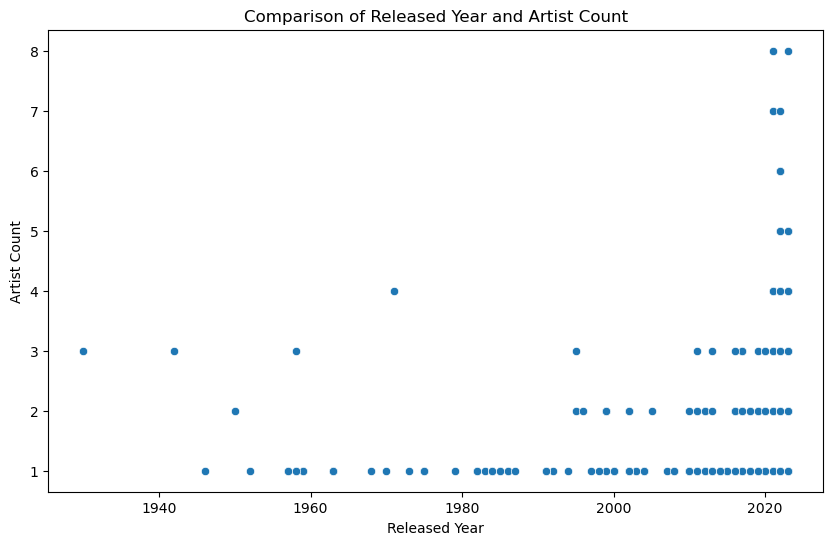

In [10]:
# Plot the distribution and box plot for 'released_year'
plt.figure(figsize=(14, 6))

# Histogram for released_year
plt.subplot(1, 2, 1)
sns.histplot(df['released_year'], kde=True, bins=15)
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')

# Box plot for released_year to identify outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['released_year'])
plt.title('Box Plot of Released Year')
plt.xlabel('Released Year')

plt.tight_layout()
plt.show()

# Plot the distribution and box plot for 'artist_count'
plt.figure(figsize=(14, 6))

# Histogram for artist_count
plt.subplot(1, 2, 1)
sns.histplot(df['artist_count'], kde=True, bins=15)
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')

# Box plot for artist_count to identify outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['artist_count'])
plt.title('Box Plot of Artist Count')
plt.xlabel('Artist Count')

plt.tight_layout()
plt.show()

# Scatter plot to compare released_year and artist_count for the noticeable trends or outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='released_year', y='artist_count', data=df)
plt.title('Comparison of Released Year and Artist Count')
plt.xlabel('Released Year')
plt.ylabel('Artist Count')
plt.show()

In [11]:
# Top Performers
# Finding the top 5 tracks by streams
top_tracks = df.nlargest(5, 'streams')
print("Top 5 Most Streamed Tracks:")
print(top_tracks[['track_name', 'streams']])

Top 5 Most Streamed Tracks:
                                        track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09


Top 5 Most Frequent Artists:
    Artist Name  Number of Tracks
0  Taylor Swift                34
1    The Weeknd                22
2     Bad Bunny                19
3           SZA                19
4  Harry Styles                17


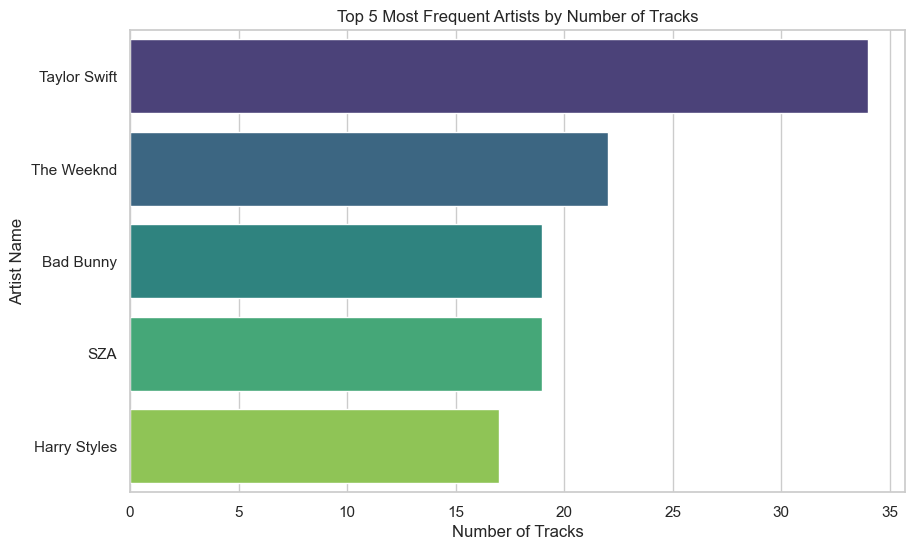

In [12]:
# Get the top 5 most frequent artists based on the number of tracks
top_artists = df['artist(s)_name'].value_counts().head(5).reset_index()
top_artists.columns = ['Artist Name', 'Number of Tracks']

# Display the result
print("Top 5 Most Frequent Artists:")
print(top_artists)

# Set up the plotting style
sns.set(style="whitegrid")

# Plot the top 5 most frequent artists
plt.figure(figsize=(10, 6))
sns.barplot(x="Number of Tracks", y="Artist Name", data=top_artists, palette="viridis", hue="Artist Name", dodge=False, legend=False)
plt.title('Top 5 Most Frequent Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.show()

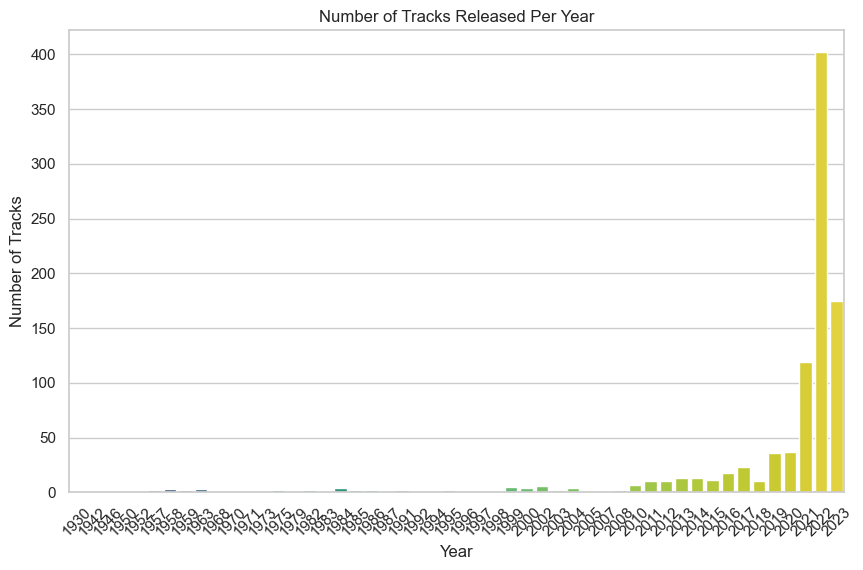

In [13]:
# Temporal Trends
# Plot the number of tracks released per year
plt.figure(figsize=(10, 6))
sns.countplot(x='released_year', data=df, palette="viridis", hue='released_year', dodge=False, legend=False)
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

    released_month  num_tracks name_month
0                1         133    January
9                2          61   February
2                3          86      March
7                4          66      April
1                5         128        May
3                6          86       June
8                7          62       July
11               8          46     August
10               9          56  September
6               10          73    October
4               11          80   November
5               12          75   December
Month with highest release is January with 133 songs


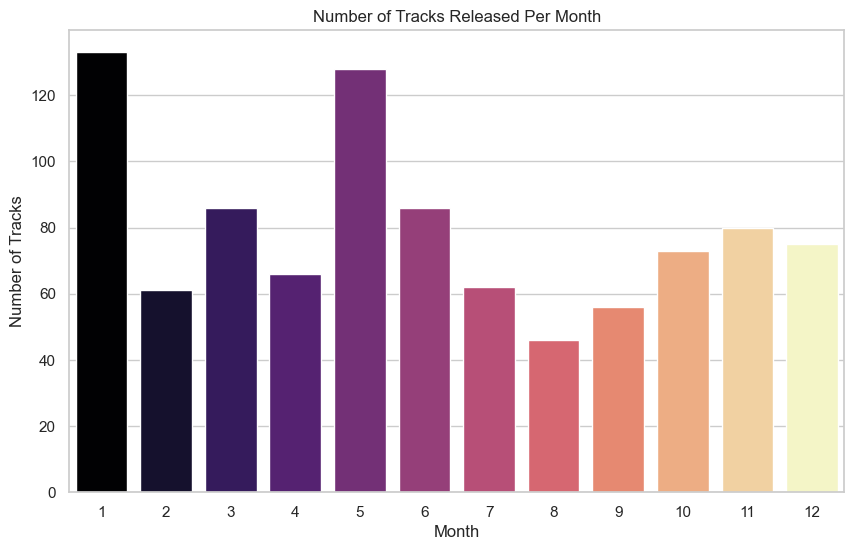

In [14]:
# Number of tracks released per month 
# Calculate the count of tracks released per month and reset the index
track_month = df['released_month'].value_counts().reset_index()
track_month.columns = ['released_month', 'num_tracks']

# Sort by 'released_month' to get months in chronological order
track_month = track_month.sort_values(by='released_month')

# Create a dictionary for mapping month numbers to month names
months = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 
          7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

# Map month numbers to names using the dictionary
track_month['name_month'] = track_month['released_month'].map(months)

# Display the DataFrame
print(track_month)

# Find the month with the highest track release count
max_month = track_month.loc[track_month['num_tracks'].idxmax()]
print(f"Month with highest release is {max_month['name_month']} with {max_month['num_tracks']} songs")

## Tracks released per month (if the dataset includes a 'released_month' column)
if 'released_month' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='released_month', data=df, palette="magma", hue='released_month', legend=False)
    plt.title('Number of Tracks Released Per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Tracks')
    plt.show()

Correlations with Streams:
streams               1.000000
bpm                  -0.002438
acousticness_%       -0.004485
energy_%             -0.026051
valence_%            -0.040831
instrumentalness_%   -0.044902
liveness_%           -0.048337
danceability_%       -0.105457
speechiness_%        -0.112333
Name: streams, dtype: float64


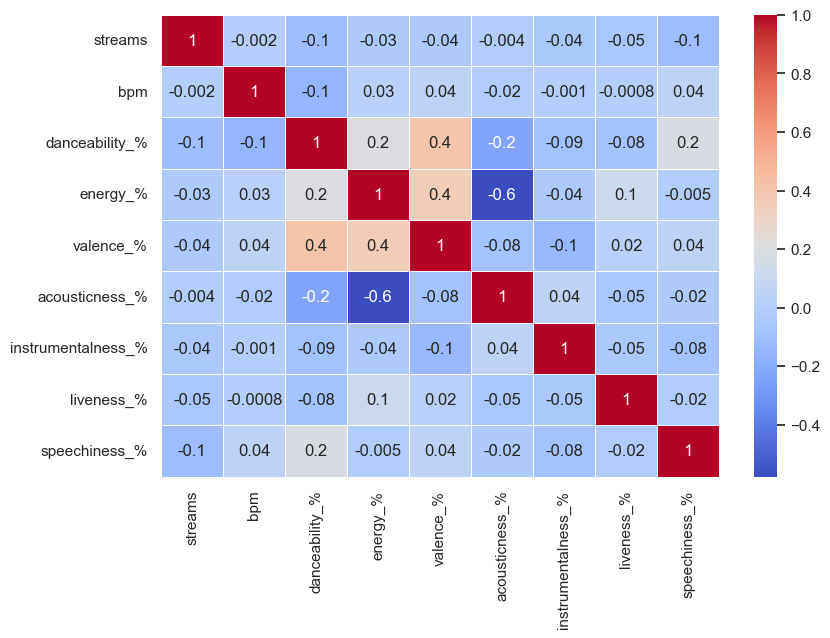

In [15]:
# Genre and Music Characteristics
# Correlation between streams and musical attributes
musical_attributes = ['bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
correlations = df[['streams'] + musical_attributes].corr()
print("Correlations with Streams:")
print(correlations['streams'].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".1g", linewidths=0.5)
plt.show()


In [16]:
# Correlation between danceability_% and energy_% and valence_% and acousticness_%
# Calculate the correlation matrix for the relevant attributes
correl = df[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()

# Extract the specific correlations
danceability_energy_corr = correl.loc['danceability_%', 'energy_%']
valence_acousticness_corr = correl.loc['valence_%', 'acousticness_%']

# Print the correlation results
print(f"Correlation between danceability_% and energy_%: {danceability_energy_corr:.2f}")
print(f"Correlation between valence_% and acousticness_%: {valence_acousticness_corr:.2f}")

Correlation between danceability_% and energy_%: 0.20
Correlation between valence_% and acousticness_%: -0.08


Track Counts Across Platforms:
in_spotify_playlists    4952842
in_deezer_playlists     95859.0
in_apple_playlists        64609
dtype: object


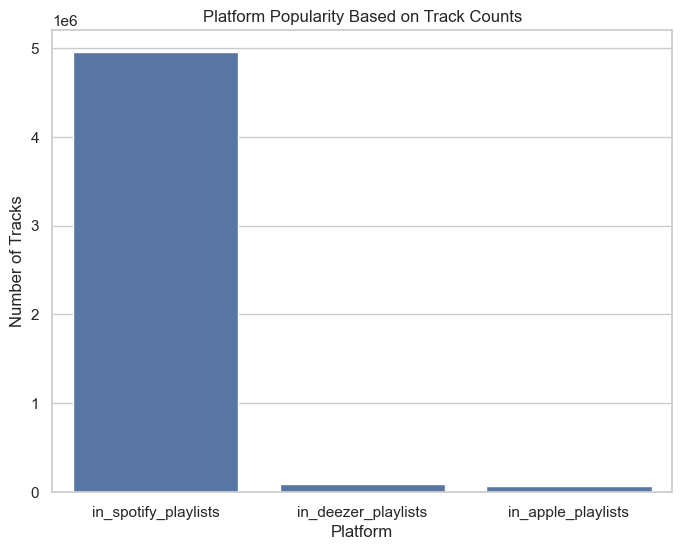

Top 5 Tracks in Playlists:
                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

     in_spotify_playlists in_deezer_playlists  in_apple_playlists  
55                  43899                 NaN                 672  
179                 32181                 NaN                  33  
86                  17836                 NaN                 440  
620                 24529                 NaN                 533  
41                  24094               843.0                 372  


In [17]:
# Platform Popularity
# Compare the number of tracks across Spotify, Deezer, and Apple playlists to analyze platform popularity and track inclusion.
platform_columns = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']

# Ensure columns are numeric for aggregation
for col in platform_columns:
    if col in df.columns:
        df.loc[:,col] = pd.to_numeric(df[col], errors='coerce')  # Use .loc to modify columns directly in the original DataFrame
    else:
        print(f"Column '{col}' not found in dataset.")

# Calculate the sum of each platform column
platform_counts = df[platform_columns].sum()

# Display platform counts
print("Track Counts Across Platforms:")
print(platform_counts)

# Plot platform popularity
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, hue=None) 
plt.title('Platform Popularity Based on Track Counts')
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.show()

# Based on the results in number 5, which is the 'sorted' data frame here are the Top 5 tracks with their respective count in the playlists
top_tracks = df.loc[[55, 179, 86, 620, 41], ['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']]
print("Top 5 Tracks in Playlists:")
print(top_tracks)

Average Streams by Key and Mode:
mode         Major         Minor
key                             
A     4.019603e+08  4.173906e+08
A#    6.275336e+08  4.849231e+08
B     4.363336e+08  5.825110e+08
C     4.999489e+08  6.008558e+08
C#    6.285883e+08  5.665252e+08
D     5.720180e+08  3.425588e+08
D#    6.819623e+08  4.793647e+08
E     7.605963e+08  5.083264e+08
F     5.279311e+08  4.102836e+08
F#    4.175450e+08  5.954921e+08
G     4.929813e+08  3.637593e+08
G#    5.458044e+08  3.219036e+08


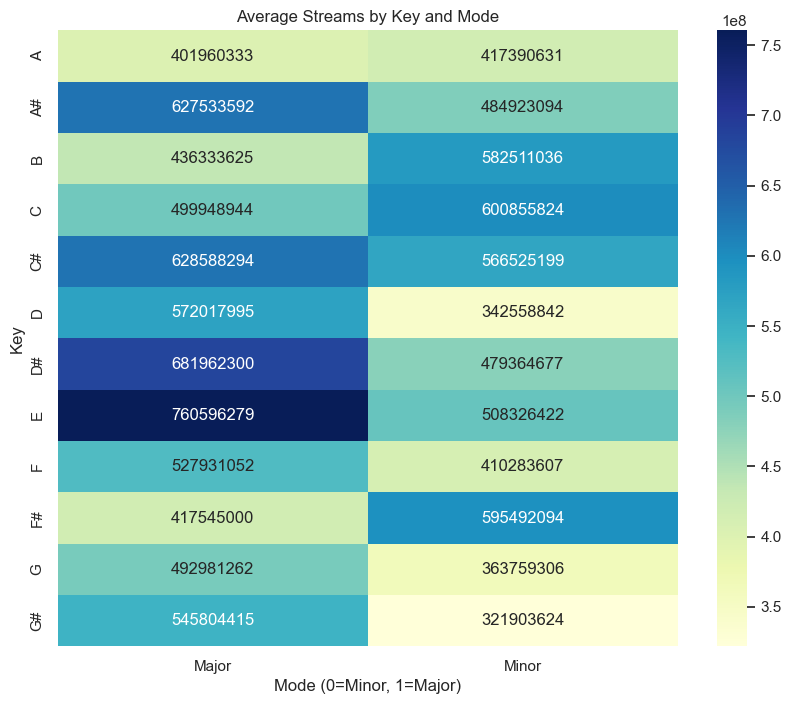

In [18]:
# Advanced Analysis
# Analyze patterns based on track key and mode
if 'key' in df.columns and 'mode' in df.columns:
    key_mode_patterns = df.groupby(['key', 'mode'])['streams'].mean().unstack()
    print("Average Streams by Key and Mode:")
    print(key_mode_patterns)

    # Heatmap of average streams by key and mode
    plt.figure(figsize=(10, 8))
    sns.heatmap(key_mode_patterns, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title('Average Streams by Key and Mode')
    plt.xlabel('Mode (0=Minor, 1=Major)')
    plt.ylabel('Key')
    plt.show()

In [19]:
# End

In [20]:
# Ensure columns used for playlist counts are numeric for aggregation
for col in platform_columns:
    if col in df.columns:
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')  # Use .loc to modify columns directly
    else:
        print(f"Column '{col}' not found in dataset.")

# Sum across specified columns to get 'total_playlists' and assign it to a new column in the DataFrame
df.loc[:, 'total_playlists'] = df[platform_columns].sum(axis=1)

# Top 5 artists by playlist appearances
top_playlist_artists = df.groupby('artist(s)_name')['total_playlists'].sum().nlargest(5)
print("\nTop 5 Artists by Playlist Appearances:")
print(top_playlist_artists)

# Visualization of the Top 5 Artists by Playlist Appearances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_playlist_artists.index, y=top_playlist_artists.values, hue=top_playlist_artists.index, palette="viridis", legend=False)
plt.title('Top 5 Artists by Playlist Appearances')
plt.xlabel('Artist Name')
plt.ylabel('Total Playlist Appearances')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

C:\Users\Yohan\AppData\Local\Temp\ipykernel_40260\3644025512.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'total_playlists'] = df[platform_columns].sum(axis=1)


TypeError: Cannot use method 'nlargest' with dtype object


Top 5 Artists by Playlist Appearances:
artist(s)_name
The Weeknd      147868.0
Taylor Swift    136478.0
Ed Sheeran      131908.0
Harry Styles    114250.0
Eminem           87806.0
Name: total_playlists, dtype: float64


C:\Users\Yohan\AppData\Local\Temp\ipykernel_40260\660224715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric and handle errors by setting as NaN
C:\Users\Yohan\AppData\Local\Temp\ipykernel_40260\660224715.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_playlists'] = df[platform_columns].sum(axis=1)
C:\Users\Yohan\AppData\Local\Temp\ipykernel_40260\660224715.py:19: FutureWarning: 

Passing `palette` without assigning `hu

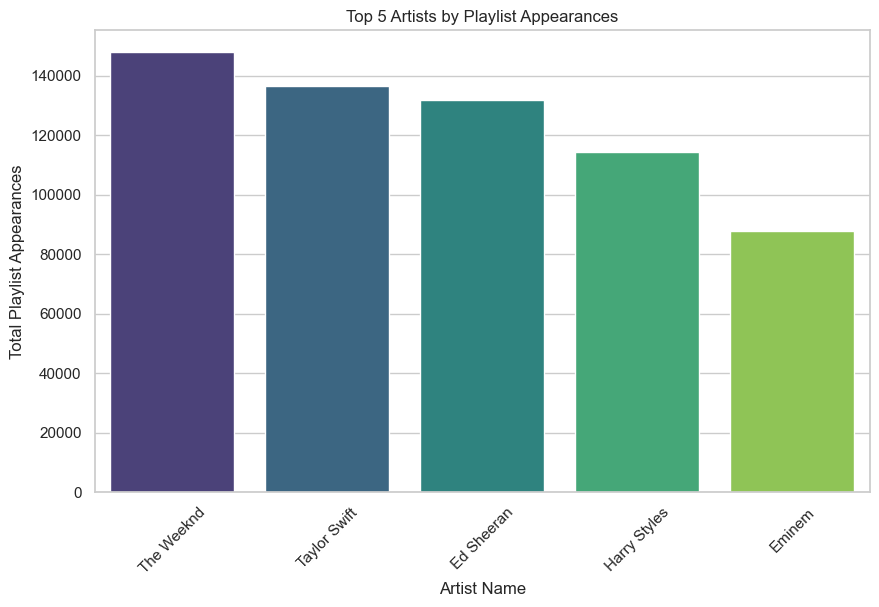

In [21]:
# Ensure columns used for playlist counts are numeric for aggregation
for col in platform_columns:
    if col in df.columns:
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')  # Use .loc to modify columns directly
    else:
        print(f"Column '{col}' not found in dataset.")

# Sum across specified columns to get 'total_playlists' and assign it to a new column in the DataFrame
df.loc[:, 'total_playlists'] = df[platform_columns].sum(axis=1)

# Top 5 artists by playlist appearances
# Group and ensure the sum is numeric to avoid TypeError
top_playlist_artists = df.groupby('artist(s)_name')['total_playlists'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Artists by Playlist Appearances:")
print(top_playlist_artists)

# Visualization of the Top 5 Artists by Playlist Appearances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_playlist_artists.index, y=top_playlist_artists.values, hue=top_playlist_artists.index, palette="viridis", legend=False)
plt.title('Top 5 Artists by Playlist Appearances')
plt.xlabel('Artist Name')
plt.ylabel('Total Playlist Appearances')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()
